# SIMPLE APPROACH TO ANY NLP PROBLEM

![](https://miro.medium.com/max/770/1*yfr3m-JjwQLucxIsThIJGQ.jpeg)

Purpose of this notebook is give a **brief idea on Machine learning and Deep learning implementation on any NLP.** As we all know that there are various different approaches to solve any NLP problem. For eg: Frequency based model like Tfidf and various Prediction based model like Word2Vec. <br>  

**NLP Begineer's** people like me faces **lots and lots of doubt** to understand. As for same problem some people are using ML techniques whereas others are using DL approach using **pretrained vectors**. It gave me tough time for Begineers understand all things. <br>

Therefore i decided to make a kernel on **NLP with all approaches to a single problem** <br>
**A Big thanks to GrandMaster [SRK](https://www.kaggle.com/sudalairajkumar) **<br>
Your kernel helped a lot to get overall idea 

## Give your Upvotes and comment down your suggestion so that we together improve this kernel :)


I have divided this Notebook into two part. <br>
<br>
Part 1 : This part will talk about various **ML approaches to NLP **problems.<br> <br> Part 2: This will give a brief idea on **DL approaches to NLP **problems
<br>
<br>
Let's get started ...

# Part 1 : Machine learning approches 
**1. Meta features**
<br>
 <a> a. Basic feature extract</a>

**2. Text based features**
<br>
 <a> a. Count Vectorization (word_based)</a>
<br>
 <a> b. Count Vectorization (word_based + Dimension Reduction)</a>
<br>
 <a> c. Count Vectorization (char_based)</a>
<br>
 <a> d. Tfidf Vectorization (word_based)</a>
<br>
 <a> e. Tfidf Vectorization (word_based + Dimension Reduction)</a>
<br>
 <a> f.  Tfidf Vectorization (char_based)</a>

# Part 2 : Deep learning approches
**1. Without Using Pretrained Vector**
<br>
<br>
**2. With Pretrained Vector**
<br>
<a> a. Word2Vec</a>
<br>
<a> b. Glove</a>
<br>
<a> c. Fastext</a>
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import nltk, os, re, string
from nltk.corpus import stopwords
import string
print(os.listdir('../input/'))

['fasttext-wikinews', 'glove-global-vectors-for-word-representation', 'machinehacknewscategory', 'nlpword2vecembeddingspretrained', 'news-headlines-dataset-for-sarcasm-detection']


# Part 1 : ML approaches

In [2]:
train = pd.read_excel('../input/machinehacknewscategory/Data_Train.xlsx')
train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


Let's check target distribution

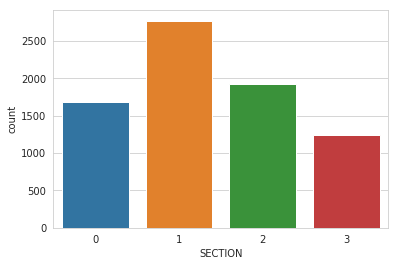

In [3]:
sns.countplot(train.SECTION)

We have 4 classes of qualitative targets. It is little bit **imbalanced** but let's ignore this for now

# 1. Meta features
In meta features we try to generate some basic features which we can use as an input to our Machine learning model. 
<br>This is the simplest and fastest way to make a model without much of the hassle. <br>


## <a> a. Basic feature extraction</a>

In [4]:
## A. TOTAL NUMBER OF WORDS USED 
train['nb_words'] = train.STORY.apply(lambda x: len(x.split()))

## B. TOTAL NUMBER OF UNIQUE WORDS USED
train['nb_unique_words'] = train.STORY.apply(lambda x: len(set(x.split())))

## C. TOTAL NUMBER OF CHARACTERS USED
train['nb_char'] = train.STORY.apply(lambda x: len(x))

In [5]:
## D. TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
train['nb_punct'] = train.STORY.apply(lambda x: punct(x))

## E. TOTAL NUMBER OF STOPWORDS USED
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
train['nb_stopwords'] = train.STORY.apply(lambda x: stop(x))

## F. TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
train['nb_title_case'] = train.STORY.apply(lambda x: title(x))

## G. AVERAGE LENGTH OF WORDS
def length(text):
    return(np.mean([len(w) for w in text.split()]))
train['avg_len_word'] = train.STORY.apply(lambda x: length(x))

In [6]:
## H. NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join(train.STORY))
frequent = nltk.FreqDist(token)
frequent.most_common(15)

[('the', 43953),
 (',', 42578),
 ('.', 25629),
 ('to', 21016),
 ('of', 20440),
 ('and', 20345),
 ('a', 17498),
 ('in', 16906),
 ('is', 9651),
 ('’', 8035),
 ('on', 7971),
 ('for', 7526),
 ('that', 7201),
 ('The', 6344),
 ('with', 6132)]

In [7]:
## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('’', 8035),
 ('The', 6344),
 ("''", 4209),
 ('“', 3857),
 ('said', 3472),
 ('also', 2505),
 ('India', 2034),
 ('BJP', 1775),
 ('Congress', 1665),
 ("'s", 1658),
 ('It', 1576),
 ('``', 1570),
 ('I', 1493),
 ('new', 1379),
 ('year', 1370)]

In [8]:
%%time
## I. NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS 
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
train['nb_freq_words'] = train.STORY.apply(lambda x: freq(x))

CPU times: user 1.44 s, sys: 8 ms, total: 1.45 s
Wall time: 1.45 s


In [9]:
%%time
## J. AVERAGE OF FREQ TERMS WITH TOTAL WORDS USED
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
train['avg_freq_word']= train.STORY.apply(lambda x: freq(x))

CPU times: user 1.62 s, sys: 0 ns, total: 1.62 s
Wall time: 1.62 s


We got lot's of meta features about our Text field. <br><br>Now we will  this basic features in our ML model and will check **model performance**. First Let's check our dataframe and also label and do preprocessing.

In [10]:
train_label = train.SECTION
train_backup = train
train = train.drop(columns=['SECTION','STORY'])
train.head(1)

,nb_words,nb_unique_words,nb_char,nb_punct,nb_stopwords,nb_title_case,avg_len_word,nb_freq_words,avg_freq_word
0,148,108,843,0,62,10,4.675676,5,0.033784


Let's import some libraries for ML model and also create some helper function to train and plot graph as per our requirement. 

In [11]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
import xgboost as xgb
import lightgbm as lgb

In [12]:
## Helper function to train and plot LGB and XGB models
param_xgb = {}
param_xgb['objective'] = 'multi:softprob'
param_xgb['num_class'] = 4
param_xgb['learning_rate'] = 0.1
param_xgb['seed'] = 666
param_xgb['eval_metric'] = 'mlogloss'

param_lgb = {}
param_lgb['objective'] = 'multiclass'
param_lgb['num_classes'] = 4
param_lgb['learning_rate'] = 0.1
param_lgb['seed'] = 666
param_lgb['metric'] = 'multi_logloss'

def lgb_xgb_helper(train, train_label ,name):
    cv = []
    pred_based_on_cv = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 4)))
    kfold = KFold(n_splits=5, shuffle= True, random_state=2019)
    for t_index, v_index in kfold.split(train_label.ravel()):
        xtrain, ytrain = train.loc[t_index,:], train_label[t_index]
        xtest, ytest = train.loc[v_index,:], train_label[v_index]
        if (name == 'xgb'):
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest, label=ytest)
            model = xgb.train(list(param_xgb.items()), trainset, evals=[(trainset,'train'), (testset,'test')], 
                             num_boost_round = 5000, early_stopping_rounds = 200, verbose_eval= 200)
            pred_based_on_cv.loc[v_index,:] = model.predict(testset, ntree_limit = model.best_ntree_limit)
        else :
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest, reference=trainset)
            model = lgb.train(param_lgb, trainset, valid_sets= testset ,
                             num_boost_round= 5000, early_stopping_rounds = 200,  verbose_eval= 200)
            pred_based_on_cv.loc[v_index,:] = model.predict(xtest, best_iteration = model.best_iteration)
    cv.append(log_loss(ytest, pred_based_on_cv.loc[v_index,:]))
    return(np.mean(cv), pred_based_on_cv, model)

def lgb_xgb_plotting(cv, pred, label, model, name=None):
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    print("CV score : %s" %cv)
    sns.heatmap(confusion_matrix(label, np.argmax(pred.values, axis=1)), annot=True, ax= ax[0])
    ax[0].set_title("Accuracy : %s" % accuracy_score(np.argmax(pred.values, axis=1), train_label))
    name.plot_importance(model, ax= ax[1])
    plt.title("Feature Importance")
    return(accuracy_score(np.argmax(pred.values, axis=1), train_label), cv)

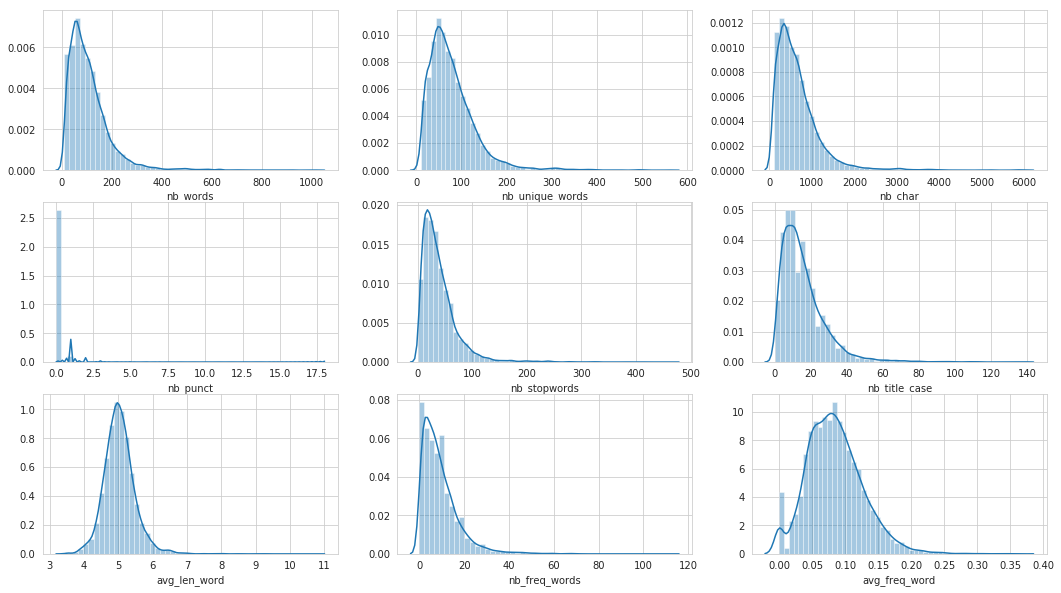

In [13]:
# Let's check data distribution
plt.subplots(3,3, figsize = (18,10))
i = 1
for col in train.columns :
    plt.subplot(3,3,i)
    sns.distplot(train[col])
    i = i+1

Most of the columns are **positive skewed**. We can use log transformation but let's ignore this for now. <br>Lets use **StandardScaler** before using this to build our model so that each columns are aligned to Standard deviation as 1 and mean as 0

In [14]:
std_scaler = StandardScaler()
train = pd.DataFrame(std_scaler.fit_transform(train), columns = train.columns)

In [15]:
# TRAIN LGB MODEL ON META FEATURES
cv, pred, model = lgb_xgb_helper(train, train_label, 'lgb')

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.994929
Early stopping, best iteration is:
[100]	valid_0's multi_logloss: 0.976841
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.952382
Early stopping, best iteration is:
[87]	valid_0's multi_logloss: 0.931502
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.984159
Early stopping, best iteration is:
[131]	valid_0's multi_logloss: 0.971529
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 1.04199
Early stopping, best iteration is:
[79]	valid_0's multi_logloss: 0.996428
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 1.00679
Early stopping, best iteration is:
[98]	valid_0's multi_logloss: 0.987829


CV score : 0.9878293508168341


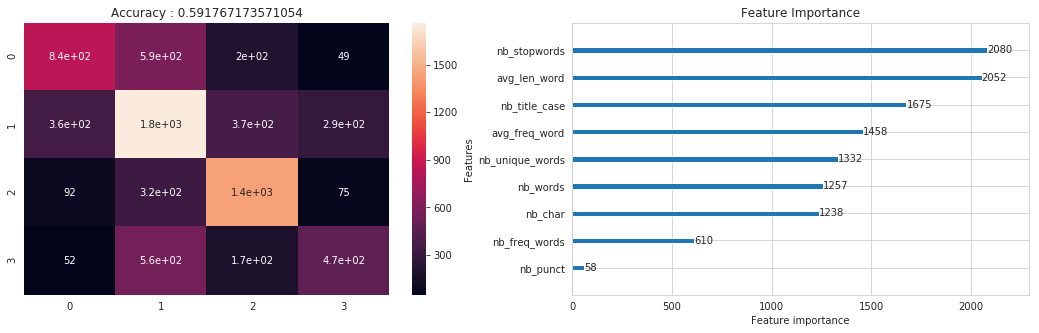

In [16]:
# PLOTTING LGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
meta_acc_lgb, meta_cv_lgb = lgb_xgb_plotting(cv , pred, train_label, model, lgb)

Pretty Bad here :( <br>
Meta features performance are very bad. Let's try **Kaggle's most popular model: XGB**

In [17]:
# TRAIN XGB MODEL ON META FEATURES
cv, pred, model = lgb_xgb_helper(train, train_label, 'xgb')

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-mlogloss:1.33531	test-mlogloss:1.34561
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	train-mlogloss:0.467694	test-mlogloss:1.00165
Stopping. Best iteration:
[132]	train-mlogloss:0.563622	test-mlogloss:0.992169

[0]	train-mlogloss:1.33724	test-mlogloss:1.34354
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	train-mlogloss:0.483164	test-mlogloss:0.950045
Stopping. Best iteration:
[128]	train-mlogloss:0.584782	test-mlogloss:0.941222

[0]	train-mlogloss:1.33509	test-mlogloss:1.34569
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	train-mlogloss:0.472324	test-mlogloss:0.993674
Stopping. Best iteration:
[110]	train-mlogloss:0.605604	test-mlogloss:0.98633



CV score : 0.9920736735447461


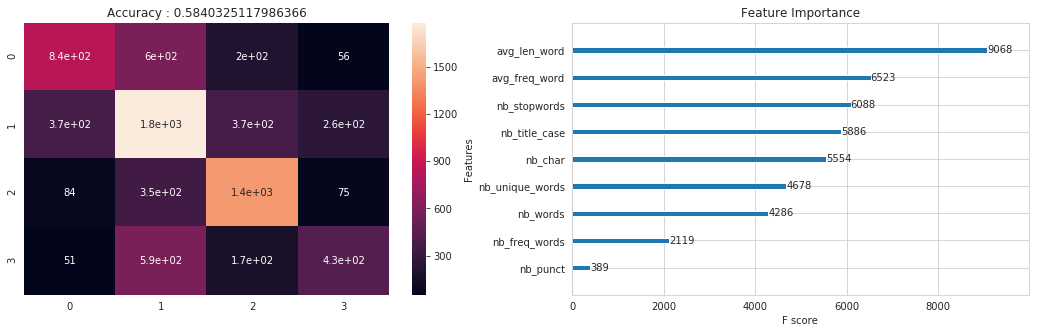

In [18]:
# PLOTTING XGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
meta_acc_xgb, meta_cv_xgb = lgb_xgb_plotting(cv, pred, train_label, model, xgb)

XGB also perform very bad. Let's move to Text based features and using that we will try to build our Model

# 2. Text based feature

In this we basically use word/letter Frequencies in order to determine their relavance. Before getting started let's import some libraries and also create some helper function to train and plot model.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB

In [20]:
def helper(train, train_label ,model):
    cv = []
    pred_based_on_cv = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 4)))
    kfold = KFold(n_splits=5, shuffle= True, random_state= 2019)
    for t_index, v_index in kfold.split(train_label.ravel()):
        xtrain, ytrain = train[t_index,:], train_label[t_index]
        xtest, ytest = train[v_index,:], train_label[v_index]
        
        model.fit(xtrain, ytrain)
        pred_based_on_cv.loc[v_index,:] = model.predict_proba(xtest)
        cv.append(log_loss(ytest, pred_based_on_cv.loc[v_index,:]))
    return(np.mean(cv), pred_based_on_cv)

def plotting_helper(cv, pred, label, name=None):
    print("CV score : %s" %cv)
    plt.figure(figsize = (9,5))
    sns.heatmap(confusion_matrix(label, np.argmax(pred.values, axis=1)), annot=True)
    plt.title("Accuracy : %s" % accuracy_score(np.argmax(pred.values, axis=1), train_label))
    return(accuracy_score(np.argmax(pred.values, axis=1), train_label), cv)

## <a> A. COUNT VECTORIZATION :- </a>

In [21]:
# COUNT VECTORIZATION USING WORD AS LOWEST LEVEL
count_vec = CountVectorizer(ngram_range=(1,3), stop_words='english')
count_vec.fit(train_backup['STORY'].values.tolist())
train_count_vec = count_vec.transform(train_backup['STORY'].values.tolist())
train_count_vec.shape

(7628, 729975)

After applying Count Vectorization over all text we got sparse matrix of size **(7628, 729975)**. This is **huge matrix**

CV score : 0.4020936973577184


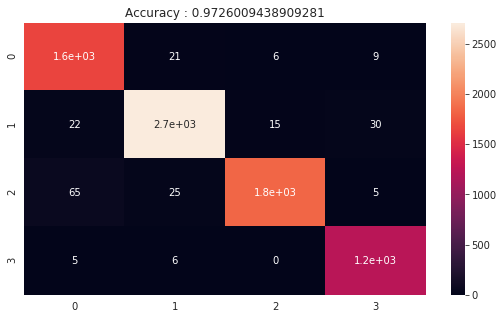

In [22]:
cv, pred = helper(train_count_vec, train_label, MultinomialNB())
count_acc_mnb, count_cv_mnb = plotting_helper(cv, pred, train_label)

Here we can clearly see simple CountVectorization performed way better than any Meta based model. **We got around 97 %** accuracy and Our confusion matrix also looks great.<br>
<br>
<br>
Since CountVectorized will contain a sparse matrix. and if we use that matrix for our LGB, XGB model then it will takes lot's of time so better way is to use Dimension reduction technique and then apply XGB/LGB

## <a> B. COUNT VECTORIZATION + DIMENSION REDUCTION :-</a>

In [23]:
# REDUCING DIMENSION OF SPARSE MATRIX TO 20 COMPONENTS
svd = TruncatedSVD(n_components=20)
svd.fit_transform(train_count_vec)
train_count_vec_svd = svd.transform(train_count_vec)
train_count_vec_svd.shape

(7628, 20)

We have reduce shape from **(7628, 729975) to (7628, 20)**. Let's see how LGB and XGB perform on this reduced matrix

In [24]:
# # TRAIN XGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_count_vec_svd), train_label, 'xgb')

[0]	train-mlogloss:1.23015	test-mlogloss:1.23658
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	train-mlogloss:0.012227	test-mlogloss:0.164396
Stopping. Best iteration:
[169]	train-mlogloss:0.015482	test-mlogloss:0.163595

[0]	train-mlogloss:1.23084	test-mlogloss:1.23486
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	train-mlogloss:0.012714	test-mlogloss:0.177854
Stopping. Best iteration:
[112]	train-mlogloss:0.029659	test-mlogloss:0.169094

[0]	train-mlogloss:1.22888	test-mlogloss:1.2406
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	train-mlogloss:0.010408	test-mlogloss:0.234309
Stopping. Best iteration:
[95]	train-mlogloss:0.030238	test-mlogloss:0.215404

[0]	train-mlogloss:1.2288	test-mlogloss:1.23712
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[

CV score : 0.2180284451515567


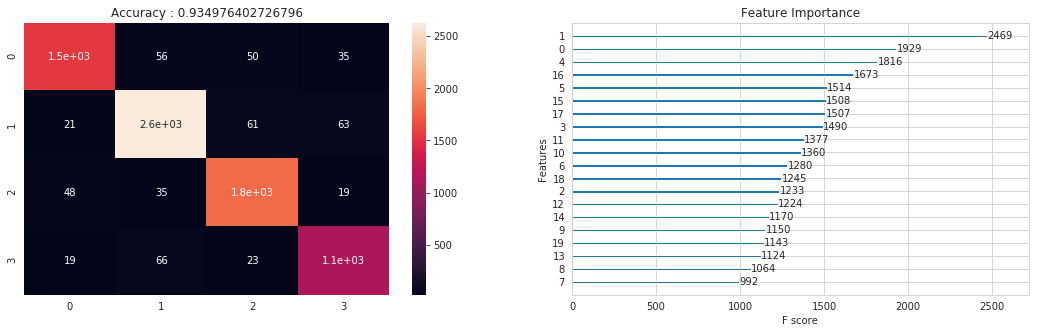

In [25]:
# PLOTTING XGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
count_acc_xgb, count_cv_xgb = lgb_xgb_plotting(cv, pred, train_label, model, xgb)

In [26]:
%%time
# # TRAIN LGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_count_vec_svd), train_label, 'lgb')

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.187991
Early stopping, best iteration is:
[95]	valid_0's multi_logloss: 0.16576
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.21444
Early stopping, best iteration is:
[77]	valid_0's multi_logloss: 0.178149
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.271961
Early stopping, best iteration is:
[77]	valid_0's multi_logloss: 0.209683
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.228717
Early stopping, best iteration is:
[87]	valid_0's multi_logloss: 0.191482
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.256367
Early stopping, best iteration is:
[89]	valid_0's multi_logloss: 0.206574
CPU times: user 1min, sys: 6.58 s, total: 1min 7s
Wall time: 35.1 s


CV score : 0.20657359580299547


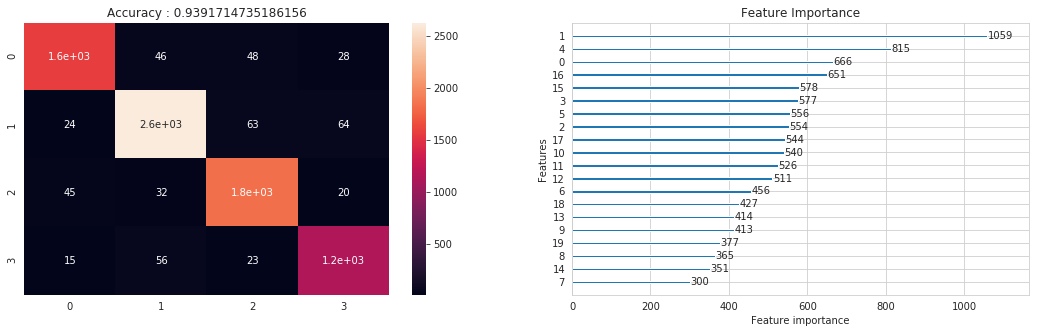

In [27]:
# PLOTTING LGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
count_acc_lgb, count_cv_lgb = lgb_xgb_plotting(cv, pred, train_label, model, lgb)

With XGB and LGB our accuracy decreased a lot. This is because of dimension reduction as we lost lot of information that we have generated through Count Vectorization part. 

## <a> C. COUNT VECTORIZATION USING CHAR NGRAM :-</a>

In [28]:
count_vec_char = CountVectorizer(ngram_range = (1,5), analyzer='char', stop_words='english')
count_vec_char.fit(train_backup.STORY.values.tolist())
train_count_vec_char = count_vec_char.transform(train_backup.STORY.values.tolist())

CV score : 0.9449245753056932


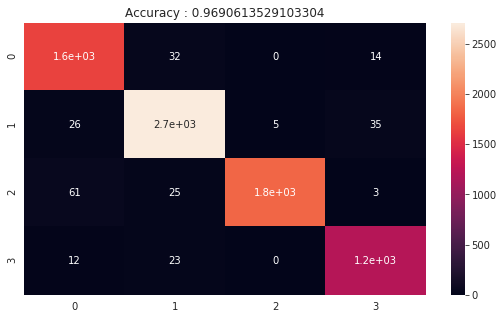

In [29]:
cv, pred = helper(train_count_vec_char, train_label, MultinomialNB())
count_acc_mnb_char, count_cv_mnb_char = plotting_helper(cv, pred, train_label)

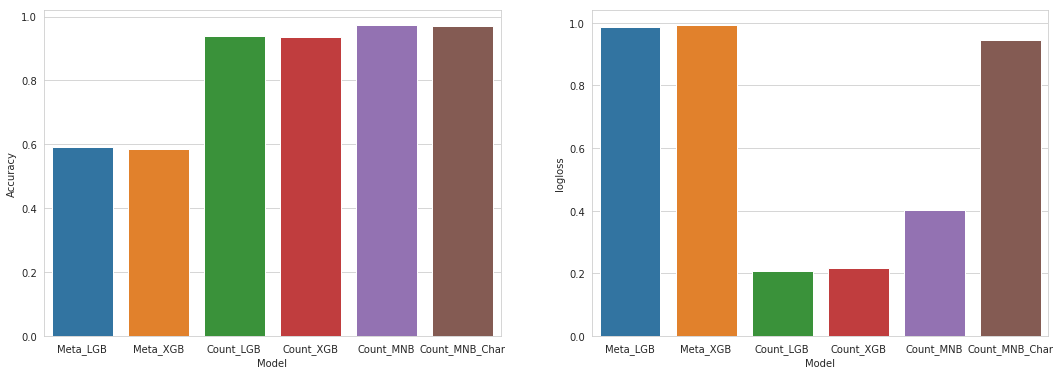

In [30]:
## COMPARISON OF MODELS TILL NOW
performance_accuracy = pd.DataFrame({'Model': ['Meta_LGB', 'Meta_XGB', 'Count_LGB', 'Count_XGB', 'Count_MNB', 'Count_MNB_Char'], 
              'Accuracy': [meta_acc_lgb, meta_acc_xgb, count_acc_lgb, count_acc_xgb, count_acc_mnb, count_acc_mnb_char]})

performance_logloss = pd.DataFrame({'Model': ['Meta_LGB', 'Meta_XGB', 'Count_LGB', 'Count_XGB', 'Count_MNB','Count_MNB_Char'], 
              'logloss': [meta_cv_lgb, meta_cv_xgb, count_cv_lgb, count_cv_xgb, count_cv_mnb, count_cv_mnb_char]})
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x = 'Model', y = 'Accuracy', data = performance_accuracy , ax= ax[0])
sns.barplot(x = 'Model', y = 'logloss', data = performance_logloss , ax= ax[1])

Till now we can see clearly that **Multinomial naive bayes** performed better than **XGB and LGB model**. As it is utilizing all words where **XGB and LGB model** can't be train on such large sparse matrix. <br><br>Therefore reduction of dimension was required. But this also leads to loss of information about out text. <br> <br>
As a result **XGB and LGB lagging behind Multinomial naive bayes**
<br>
<br>

With **logloss** ,**LGB and XGB** worked way better than **MultinomialNB** 

## <a> D. TFIDF VECTORIZATION </a>

In [31]:
tfidf_vec = TfidfVectorizer(ngram_range = (1,3), stop_words= 'english')
tfidf_vec.fit(train_backup.STORY.values.tolist())
train_tfidf_vec = tfidf_vec.transform(train_backup['STORY'].values.tolist())

CV score : 0.49788745056344264


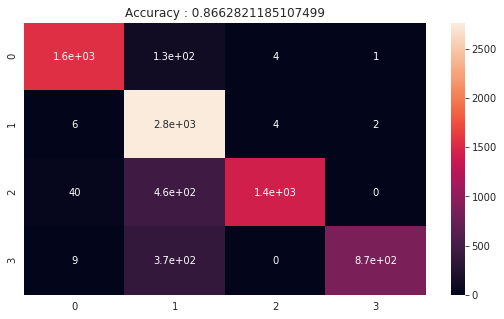

In [32]:
cv, pred = helper(train_tfidf_vec, train_label, MultinomialNB())
tfidf_acc_mnb, tfidf_cv_mnb = plotting_helper(cv, pred, train_label)

TFIDF didn't performed well. Let's check TFIDF with Boosting models

## <a> E. TFIDF + DIMENSION REDUCTION

In [33]:
train_tfidf_vec_svd = svd.fit_transform(train_tfidf_vec)
# TRAIN XGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_tfidf_vec_svd), train_label, 'xgb')

[0]	train-mlogloss:1.21445	test-mlogloss:1.21916
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	train-mlogloss:0.007398	test-mlogloss:0.1086
Stopping. Best iteration:
[88]	train-mlogloss:0.018019	test-mlogloss:0.099172

[0]	train-mlogloss:1.21486	test-mlogloss:1.21864
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	train-mlogloss:0.00796	test-mlogloss:0.120773
Stopping. Best iteration:
[88]	train-mlogloss:0.018971	test-mlogloss:0.108468

[0]	train-mlogloss:1.21294	test-mlogloss:1.22189
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	train-mlogloss:0.006688	test-mlogloss:0.21003
Stopping. Best iteration:
[56]	train-mlogloss:0.034137	test-mlogloss:0.185453

[0]	train-mlogloss:1.2144	test-mlogloss:1.21978
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 200 rounds.
[200]	

CV score : 0.14418779277770133


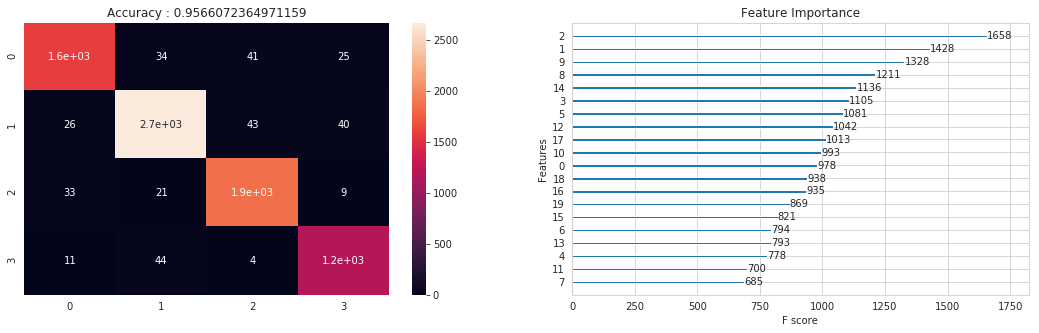

In [34]:
# PLOTTING XGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
tfidf_acc_xgb, tfidf_cv_xgb = lgb_xgb_plotting(cv, pred, train_label, model, xgb)

In [35]:
%%time
# # TRAIN LGB MODEL ON TEXT BASED FEATURES
cv, pred, model = lgb_xgb_helper(pd.DataFrame(train_tfidf_vec_svd), train_label, 'lgb')

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.132955
Early stopping, best iteration is:
[81]	valid_0's multi_logloss: 0.0946617
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.168904
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.117057
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.291471
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.182763
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.171947
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.116861
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's multi_logloss: 0.220867
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.145067
CPU times: user 53.2 s, sys: 5.78 s, total: 59 s
Wall time: 31.3 s


CV score : 0.14506709610560078


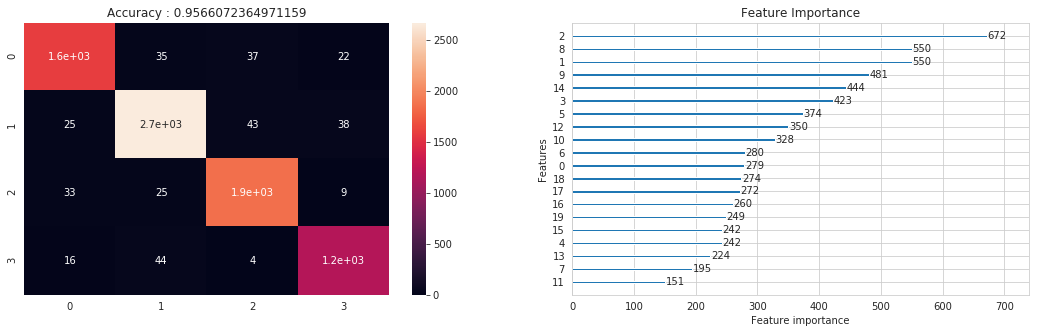

In [36]:
# PLOTTING LGB MODEL CONFUSION MATRIX AND FEATURE IMPORTANCE
tfidf_acc_lgb, tfidf_cv_lgb = lgb_xgb_plotting(cv, pred, train_label, model, lgb)

## <a> F. TFIDF CHAR BASED </a>

In [37]:
tfidf_vec_char = TfidfVectorizer(ngram_range = (1,5), stop_words= 'english', analyzer='char')
tfidf_vec_char.fit(train_backup.STORY.values.tolist())
train_tfidf_vec_char = tfidf_vec_char.transform(train_backup['STORY'].values.tolist())

CV score : 1.8853670153900293


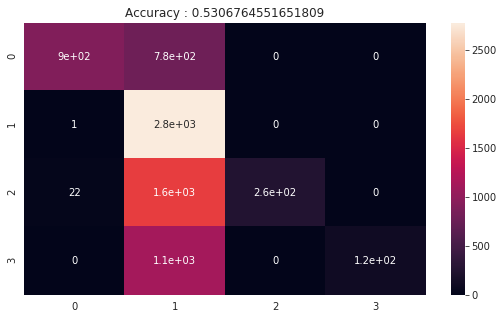

In [38]:
cv, pred = helper(train_tfidf_vec_char, train_label, MultinomialNB())
tfidf_acc_mnb_char, tfidf_cv_mnb_char = plotting_helper(cv, pred, train_label)

In [39]:
performance_accuracy = pd.concat([performance_accuracy, pd.DataFrame({'Model': ['Tfidf_MNB', 'Tfidf_XGB', 'Tfidf_LGB','Tfidf_MNB_Char'], 
                                          'Accuracy': [tfidf_acc_mnb, tfidf_acc_xgb, tfidf_acc_lgb,tfidf_acc_mnb_char]})], axis=0)

performance_logloss = pd.concat([performance_logloss, pd.DataFrame({'Model': ['Tfidf_MNB', 'Tfidf_XGB', 'Tfidf_LGB','Tfidf_MNB_Char'], 
                                          'logloss': [tfidf_cv_mnb, tfidf_cv_xgb, tfidf_cv_lgb, tfidf_acc_mnb_char]})], axis=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

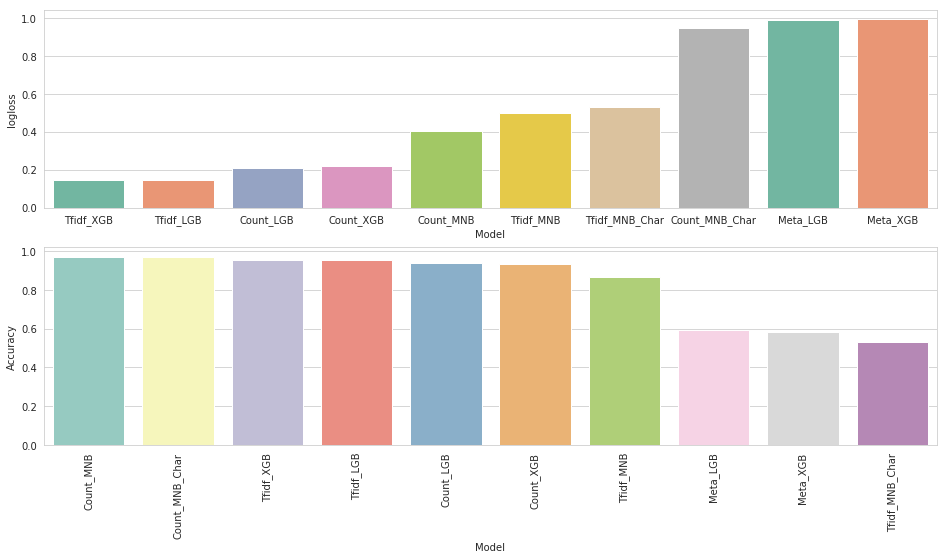

In [40]:
fig,ax= plt.subplots(2,1, figsize = (16,8))
sns.barplot('Model', 'Accuracy', data= performance_accuracy.sort_values(by = 'Accuracy', ascending=False), ax= ax[1], palette= 'Set3')
sns.barplot('Model', 'logloss', data= performance_logloss.sort_values(by = 'logloss'), ax= ax[0], palette= 'Set2')
plt.xticks(rotation= 90)

Based on **Machine Learning approches** we found **MultinomialNB** accuracy better than other. But only when we use it with **Count Vectrorization** 

If we look into **logloss** we can clearly see **LGB** logloss smaller than any other **model** <br>
But if we use it with **Count Vectorization. ** 

Till now with all **ML** approaches we got around **97% accuracy ** + logloss of ~ 0.17**. Now in next version we will see **Deep learning** approaches to **NLP** problems. Let's see how pretrained, trained model perform.

### Also check whether DL approach can beats ML aprroach or NOT

# Part 2 : DL Approach

## <a> Data Cleaning</a>

First we have to clean our data as we don't want unwanted words to be part of our vocabulary 

In [41]:
train = pd.concat([pd.DataFrame(train_backup['STORY']), pd.DataFrame(train_backup['SECTION'])], axis = 1)
train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [42]:
%%time
# STEPS TAKEN FROM SRK NOTEBOOK
# LOWER CASE ALL CHARACTERS 
train.STORY = train.STORY.apply(lambda x: x.lower())

## LEMMATIZATION
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
lemmatizer = WordNetLemmatizer()

def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

train.STORY = train.STORY.apply(lambda x: lem(x))

# REMOVING PUNCTUATION
def cleaner(text):
    return(text.translate(str.maketrans('','', string.punctuation)))
train.STORY = train.STORY.apply(lambda x: cleaner(x))

# REMOVING STOPWORDS
st_words = stopwords.words()
def stopword(text):
    return(' '.join([w for w in text.split() if w not in st_words ]))
train.STORY = train.STORY.apply(lambda x: stopword(x))

CPU times: user 2min 7s, sys: 556 ms, total: 2min 8s
Wall time: 2min 8s


In [43]:
train.head()

,STORY,SECTION
0,painful wa huge reversal fee income unheard am...,3
1,formidable opposition alliance among congress ...,0
2,asian currency trading lower today south korea...,3
3,answer question click ‘answer’ clicking answer...,1
4,global markets gold price edged today disappoi...,3


## <a>1. Without using Pretrained Vectors</a>

In [44]:
from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [45]:
train_label = to_categorical(train.SECTION, 4)
train_label.shape

(7628, 4)

In [46]:
max_words = 40000
max_len = 256

tok = Tokenizer(lower=True, char_level=False)
tok.fit_on_texts(train.STORY)
sequence = tok.texts_to_sequences(train.STORY)
sequence = pad_sequences(padding='post', sequences=sequence, maxlen= max_len)
sequence.shape

(7628, 256)

In [47]:
def modeling():
    inp = Input(shape=(max_len,))
    x = Embedding(max_words, 300 ,input_length = max_len)(inp)
    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.5)(x)
    x = Flatten()(x)
    x = Dense(128, activation= 'relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inputs = inp, outputs = x)
    return(model)

In [48]:
model = modeling()
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss= 'categorical_crossentropy')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 256, 300)          12000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256, 512)          1140736   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 512)          2048      
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 256, 512)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1677

In [49]:
lr = ReduceLROnPlateau(monitor='valid_set', factor=0.002, min_lr=0.00001)
model.fit(sequence, train_label, validation_split=0.30, callbacks=[lr], batch_size=64, epochs=10)

Train on 5339 samples, validate on 2289 samples
Epoch 1/10
5339/5339 [==============================] - 65s 12ms/step - loss: 1.5225 - accuracy: 0.4731 - val_loss: 1.4637 - val_accuracy: 0.3779
Epoch 2/10


/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `valid_set` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5339/5339 [==============================] - 62s 12ms/step - loss: 0.3557 - accuracy: 0.8842 - val_loss: 1.0396 - val_accuracy: 0.5850
Epoch 3/10
5339/5339 [==============================] - 62s 12ms/step - loss: 0.0724 - accuracy: 0.9818 - val_loss: 1.2375 - val_accuracy: 0.5675
Epoch 4/10
5339/5339 [==============================] - 63s 12ms/step - loss: 0.0439 - accuracy: 0.9904 - val_loss: 0.2952 - val_accuracy: 0.9166
Epoch 5/10
5339/5339 [==============================] - 62s 12ms/step - loss: 0.0242 - accuracy: 0.9942 - val_loss: 0.2642 - val_accuracy: 0.9039
Epoch 6/10
5339/5339 [==============================] - 63s 12ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 0.1201 - val_accuracy: 0.9616
Epoch 7/10
5339/5339 [==============================] - 63s 12ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.1100 - val_accuracy: 0.9664
Epoch 8/10
5339/5339 [==============================] - 63s 12ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.1116 - val_accura

Text(0, 0.5, 'Accuracy')

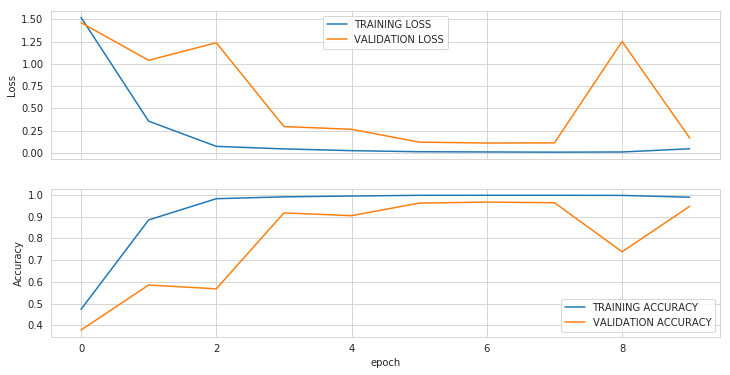

In [50]:
performance_WO = pd.DataFrame({'epoch': model.history.epoch, 'loss': model.history.history['loss'], 
              'val_loss': model.history.history['val_loss'], 'acc': model.history.history['accuracy'],
             'val_acc': model.history.history['val_accuracy']})

fig, ax = plt.subplots(2,1, figsize=(12,6), sharex = True)  
sns.lineplot(x= 'epoch', y= 'loss', data = performance_WO, ax= ax[0])
sns.lineplot(x= 'epoch', y= 'val_loss', data = performance_WO, ax = ax[0])
ax[0].legend(['TRAINING LOSS', 'VALIDATION LOSS'])
ax[0].set_ylabel('Loss')

  
sns.lineplot(x= 'epoch', y= 'acc', data = performance_WO, ax= ax[1])
sns.lineplot(x= 'epoch', y= 'val_acc', data = performance_WO, ax = ax[1])
ax[1].legend(['TRAINING ACCURACY', 'VALIDATION ACCURACY'])
ax[1].set_ylabel('Accuracy')

Based on above model we can say nearly around **epcoh 5~6** we are getting an accuracy of around **96 ~ 97%**. Which is still less than the accuracy which we got for **CountVectorization with MultinomialNB()**. <br><br>
But if we do better text cleaning then it may perform better than **CountVectorization**.

## Next plan to include in this notebook :
#### 1. DL approach (with pretrained model like Word2Vec, Glove, Fasttext)

### Comment down if you have any query/suggestion. <br> Don't forget to Upvote it :)